In [94]:
import librosa
import librosa.display
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
import csv
import os

In [2]:
# Dataset Info
dataset_info_csv = 'urbansound8k/UrbanSound8K2.csv'
dataset_info = read_csv(dataset_info_csv, header=0)
print(dataset_info)

         slice_file_name    fsID       start         end  duration  salience  \
0       100032-3-0-0.wav  100032    0.000000    0.317551  0.317551         1   
1     100263-2-0-117.wav  100263   58.500000   62.500000  4.000000         1   
2     100263-2-0-121.wav  100263   60.500000   64.500000  4.000000         1   
3     100263-2-0-126.wav  100263   63.000000   67.000000  4.000000         1   
4     100263-2-0-137.wav  100263   68.500000   72.500000  4.000000         1   
...                  ...     ...         ...         ...       ...       ...   
8727     99812-1-2-0.wav   99812  159.522205  163.522205  4.000000         2   
8728     99812-1-3-0.wav   99812  181.142431  183.284976  2.142545         2   
8729     99812-1-4-0.wav   99812  242.691902  246.197885  3.505983         2   
8730     99812-1-5-0.wav   99812  253.209850  255.741948  2.532098         2   
8731     99812-1-6-0.wav   99812  332.289233  334.821332  2.532099         2   

      fold  classID             class  

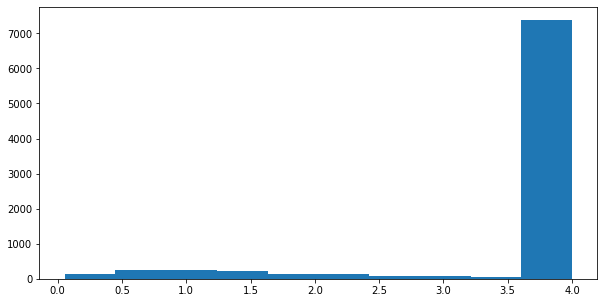

<Figure size 432x288 with 0 Axes>

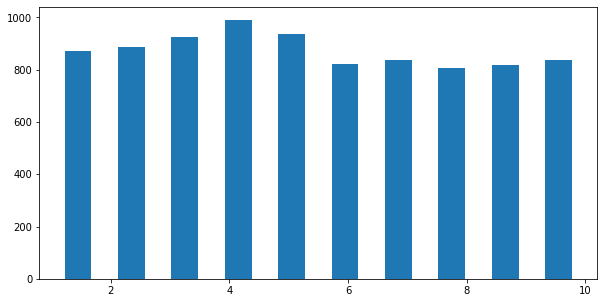

<Figure size 432x288 with 0 Axes>

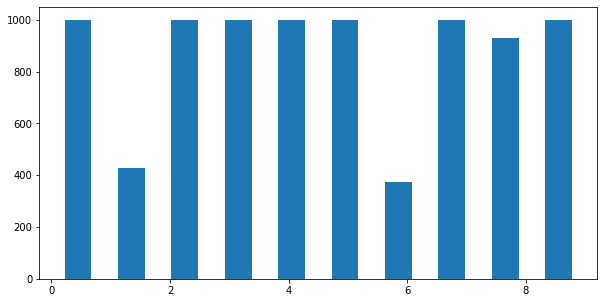

<Figure size 432x288 with 0 Axes>

In [82]:
plt.figure(figsize=(10,5))
plt.hist(dataset_info["duration"])
plt.show()
plt.clf()

plt.figure(figsize=(10,5))
plt.hist(dataset_info["fold"], align = "mid", rwidth = 0.5)
plt.show()
plt.clf()

plt.figure(figsize=(10,5))
plt.hist(dataset_info["classID"], rwidth = 0.5)
plt.show()
plt.clf()

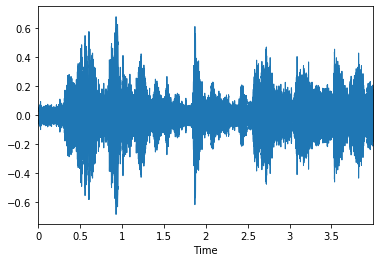

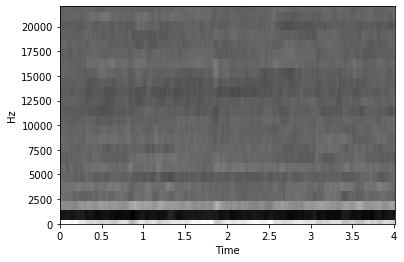

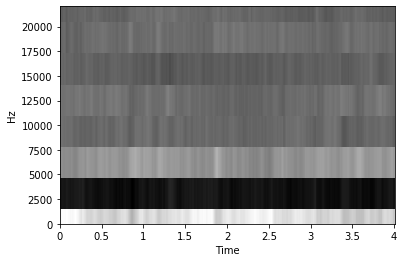

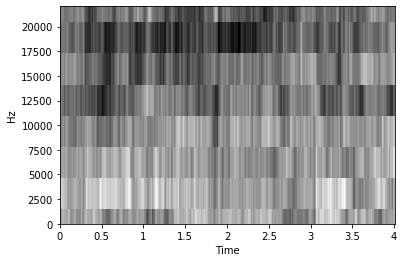

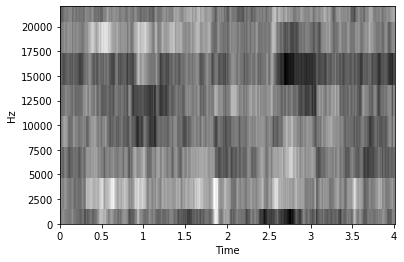

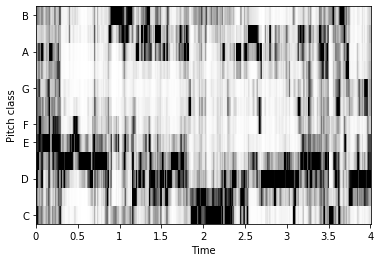

(88200,) 22050


<Figure size 432x288 with 0 Axes>

In [140]:
# Spectrogram of a sound track sample
audio_file = 'urbansound8k/fold1/97317-2-0-28.wav'
series , sample_rate = librosa.load(audio_file, sr=44100)

# Generate Wave form
librosa.display.waveplot(series, sr=sample_rate)
plt.show()
plt.clf()

# Generate MFCC Spectrogram
MFCC= librosa.feature.mfcc(series, sr=sample_rate, n_mfcc=24)
librosa.display.specshow(MFCC,sr=sample_rate, x_axis='time', y_axis='hz', cmap='gray_r')
plt.show()
plt.clf()
librosa.display.specshow(MFCC[:8,:],sr=sample_rate, x_axis='time', y_axis='hz', cmap='gray_r')
plt.show()
plt.clf()
librosa.display.specshow(MFCC[8:16,:],sr=sample_rate, x_axis='time', y_axis='hz', cmap='gray_r')
plt.show()
plt.clf()
librosa.display.specshow(MFCC[16:,:],sr=sample_rate, x_axis='time', y_axis='hz', cmap='gray_r')
plt.show()
plt.clf()

# Generate STFT Spectrogram
STFT = librosa.feature.chroma_stft(series, sr=sample_rate)
librosa.display.specshow(STFT, sr=sample_rate, x_axis='time', y_axis='chroma', cmap='gray_r')
plt.show()
plt.clf()

print(x.shape, sr)

In [97]:
# Generate Graphical data of each audio data
waveForm_dir = "./WaveForm/"
MFCC_dir = "./MFCC/"
STFT_dir = "./STFT/"

if not os.path.exists(waveForm_dir):
    os.makedirs(waveForm_dir)
    for i in range(1,11):
        os.makedirs(waveForm_dir+"/fold"+str(i))
    
if not os.path.exists(MFCC_dir):
    os.makedirs(MFCC_dir)
    for i in range(1,11):
        os.makedirs(MFCC_dir+"/fold"+str(i))
    
if not os.path.exists(STFT_dir):
    os.makedirs(STFT_dir)
    for i in range(1,11):
        os.makedirs(STFT_dir+"/fold"+str(i))

for file in dataset_info.values:
    audio_file = "urbansound8k/" + "fold" + str(file[6]) + "/" + file[0]
    series , sample_rate = librosa.load(audio_file)
    
    # Generate Wave form
    librosa.display.waveplot(series, sr=sample_rate)
    plt.axis('off')
    plt.savefig(waveForm_dir+"fold"+str(file[6])+"/"+file[0].replace(".wav", ".png"))
    plt.clf()

    # Generate MFCC Spectrogram
    MFCC= librosa.feature.mfcc(series, sr=sample_rate)
    librosa.display.specshow(MFCC, sr=sample_rate, cmap='gray_r')
    plt.axis('off')
    plt.savefig(MFCC_dir+ "fold" + str(file[6]) + "/" +file[0].replace(".wav", ".png"))
    plt.clf()

    # Generate STFT Spectrogram
    STFT = librosa.feature.chroma_stft(series, sr=sample_rate)
    librosa.display.specshow(STFT, cmap='gray_r')
    plt.axis('off')
    plt.savefig(STFT_dir+ "fold" + str(file[6]) + "/" +file[0].replace(".wav", ".png"))
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [44]:
# Features
names = ['filename'
          ,'fold','duration'
          ,'chroma_stft_mean'
          ,'chroma_stft_variance'
          , 'rmse_mean'
          , 'rmse_variance'
          , 'spectral_centroid_mean'
          , 'spectral_centroid_variance'
          , 'spectral_bandwidth_mean'
          , 'spectral_bandwidth_variance'
          , 'spectral_rolloff_mean'
          , 'spectral_rolloff_variance'
          , 'zero_crossing_rate_mean'
          , 'zero_crossing_rate_variance']
for i in range (1,21):
    names.append("MFCC_"+str(i)+"_mean")
    names.append("MFCC_"+str(i)+"_variance")

names.append('class_ID')
print(names)

['filename', 'fold', 'duration', 'chroma_stft_mean', 'chroma_stft_variance', 'rmse_mean', 'rmse_variance', 'spectral_centroid_mean', 'spectral_centroid_variance', 'spectral_bandwidth_mean', 'spectral_bandwidth_variance', 'spectral_rolloff_mean', 'spectral_rolloff_variance', 'zero_crossing_rate_mean', 'zero_crossing_rate_variance', 'MFCC_1_mean', 'MFCC_1_variance', 'MFCC_2_mean', 'MFCC_2_variance', 'MFCC_3_mean', 'MFCC_3_variance', 'MFCC_4_mean', 'MFCC_4_variance', 'MFCC_5_mean', 'MFCC_5_variance', 'MFCC_6_mean', 'MFCC_6_variance', 'MFCC_7_mean', 'MFCC_7_variance', 'MFCC_8_mean', 'MFCC_8_variance', 'MFCC_9_mean', 'MFCC_9_variance', 'MFCC_10_mean', 'MFCC_10_variance', 'MFCC_11_mean', 'MFCC_11_variance', 'MFCC_12_mean', 'MFCC_12_variance', 'MFCC_13_mean', 'MFCC_13_variance', 'MFCC_14_mean', 'MFCC_14_variance', 'MFCC_15_mean', 'MFCC_15_variance', 'MFCC_16_mean', 'MFCC_16_variance', 'MFCC_17_mean', 'MFCC_17_variance', 'MFCC_18_mean', 'MFCC_18_variance', 'MFCC_19_mean', 'MFCC_19_variance', '

In [43]:
# Read all WAV files and extract all features write into a new csv file

with open('urbansound8k_features.csv', 'w', newline='') as allFeatures:
    writer = csv.writer(allFeatures)
    writer.writerow(names)

    for file in dataset_info.values:
        audio_file = "urbansound8k/" + "fold" + str(file[6]) + "/" + file[0]
        series , sample_rate = librosa.load(audio_file)
        chroma_stft = librosa.feature.chroma_stft(y=series, sr=sample_rate)
        rmse = librosa.feature.rms(y=series)
        spectral_centroid = librosa.feature.spectral_centroid(y=series, sr=sample_rate)
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=series, sr=sample_rate)
        spectral_rolloff = librosa.feature.spectral_rolloff(y=series, sr=sample_rate)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(series)
        MFCC = librosa.feature.mfcc(y=series, sr=sample_rate)

        chroma_stft_mean = np.mean(chroma_stft)
        chroma_stft_variance = np.var(chroma_stft)
        rmse_mean = np.mean(rmse)
        rmse_variance = np.var(rmse)
        spectral_centroid_mean = np.mean(spectral_centroid)
        spectral_centroid_variance = np.var(spectral_centroid)
        spectral_bandwidth_mean = np.mean(spectral_bandwidth)
        spectral_bandwidth_variance = np.var(spectral_bandwidth)
        spectral_rolloff_mean = np.mean(spectral_rolloff)
        spectral_rolloff_variance = np.var(spectral_rolloff)
        zero_crossing_rate_mean = np.mean(zero_crossing_rate)
        zero_crossing_rate_variance = np.var(zero_crossing_rate)

        sample = [file[0].replace(".wav","")
                  , file[6]
                  , file[4]
                  , chroma_stft_mean
                  , chroma_stft_variance
                  , rmse_mean
                  , rmse_variance
                  , spectral_centroid_mean
                  , spectral_centroid_variance
                  , spectral_bandwidth_mean
                  , spectral_bandwidth_variance
                  , spectral_rolloff_mean, spectral_rolloff_variance
                  , zero_crossing_rate_mean
                  , zero_crossing_rate_variance]

        for mfcc in MFCC:
            mfcc_mean = np.mean(mfcc)
            mfcc_variance = np.mean(mfcc)
            sample.append(mfcc_mean)
            sample.append(mfcc_variance)
            
        sample.append(file[7])
        
        writer.writerow(sample)
        print(file[0])
    allFeatures.close()

100032-3-0-0.wav
100263-2-0-117.wav
100263-2-0-121.wav
100263-2-0-126.wav
100263-2-0-137.wav
100263-2-0-143.wav
100263-2-0-161.wav
100263-2-0-3.wav
100263-2-0-36.wav
100648-1-0-0.wav
100648-1-1-0.wav
100648-1-2-0.wav
100648-1-3-0.wav
100648-1-4-0.wav
100652-3-0-0.wav
100652-3-0-1.wav
100652-3-0-2.wav
100652-3-0-3.wav
100795-3-0-0.wav
100795-3-1-0.wav
100795-3-1-1.wav
100795-3-1-2.wav
100852-0-0-0.wav
100852-0-0-1.wav
100852-0-0-10.wav
100852-0-0-11.wav
100852-0-0-12.wav
100852-0-0-13.wav
100852-0-0-14.wav
100852-0-0-15.wav
100852-0-0-16.wav
100852-0-0-17.wav
100852-0-0-18.wav
100852-0-0-19.wav
100852-0-0-2.wav
100852-0-0-20.wav
100852-0-0-21.wav
100852-0-0-22.wav
100852-0-0-23.wav
100852-0-0-24.wav
100852-0-0-25.wav
100852-0-0-26.wav
100852-0-0-27.wav
100852-0-0-28.wav
100852-0-0-29.wav
100852-0-0-3.wav
100852-0-0-30.wav
100852-0-0-4.wav
100852-0-0-5.wav
100852-0-0-6.wav
100852-0-0-7.wav
100852-0-0-8.wav
100852-0-0-9.wav
101281-3-0-0.wav
101281-3-0-14.wav
101281-3-0-5.wav
101382-2-0-10

/Applications/Anaconda3/anaconda3/lib/python3.7/site-packages/librosa/core/pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


101729-0-0-1.wav
101729-0-0-11.wav
101729-0-0-12.wav
101729-0-0-13.wav
101729-0-0-14.wav
101729-0-0-16.wav
101729-0-0-17.wav
101729-0-0-18.wav
101729-0-0-19.wav
101729-0-0-21.wav
101729-0-0-22.wav
101729-0-0-23.wav
101729-0-0-24.wav
101729-0-0-26.wav
101729-0-0-28.wav
101729-0-0-29.wav
101729-0-0-3.wav
101729-0-0-32.wav
101729-0-0-33.wav
101729-0-0-36.wav
101729-0-0-37.wav
101729-0-0-38.wav
101729-0-0-39.wav
101729-0-0-4.wav
101729-0-0-40.wav
101729-0-0-6.wav
101729-0-0-9.wav
101848-9-0-0.wav
101848-9-0-1.wav
101848-9-0-2.wav
101848-9-0-3.wav
101848-9-0-8.wav
101848-9-0-9.wav
102102-3-0-0.wav
102103-3-0-0.wav
102103-3-1-0.wav
102104-3-0-0.wav
102105-3-0-0.wav
102106-3-0-0.wav
102305-6-0-0.wav
102547-3-0-2.wav
102547-3-0-7.wav
102547-3-0-8.wav
102842-3-0-1.wav
102842-3-1-0.wav
102842-3-1-5.wav
102842-3-1-6.wav
102853-8-0-0.wav
102853-8-0-1.wav
102853-8-0-2.wav
102853-8-0-3.wav
102853-8-0-4.wav
102853-8-0-5.wav
102853-8-0-6.wav
102853-8-1-0.wav
102857-5-0-0.wav
102857-5-0-1.wav
102857-5-

107653-9-0-18.wav
107653-9-0-3.wav
107653-9-0-5.wav
107653-9-0-7.wav
107842-4-0-0.wav
107842-4-0-1.wav
107842-4-0-2.wav
107842-4-1-0.wav
107842-4-2-0.wav
107842-4-2-1.wav
107842-4-2-2.wav
107842-4-2-3.wav
107842-4-2-4.wav
107842-4-3-0.wav
108041-9-0-11.wav
108041-9-0-2.wav
108041-9-0-4.wav
108041-9-0-5.wav
108041-9-0-6.wav
108041-9-0-7.wav
108041-9-0-9.wav
108187-3-2-0.wav
108187-3-3-0.wav
108187-3-4-0.wav
108187-3-6-0.wav
108357-9-0-15.wav
108357-9-0-2.wav
108357-9-0-27.wav
108357-9-0-30.wav
108357-9-0-44.wav
108357-9-0-49.wav
108362-2-0-11.wav
108362-2-0-12.wav
108362-2-0-21.wav
108362-2-0-23.wav
108362-2-0-29.wav
108362-2-0-30.wav
108362-2-0-7.wav
108362-2-0-9.wav
108638-9-0-0.wav
108638-9-0-1.wav
108638-9-0-2.wav
108638-9-0-4.wav
108638-9-0-5.wav
108638-9-0-6.wav
109233-3-0-3.wav
109233-3-0-4.wav
109233-3-0-5.wav
109233-3-0-6.wav
109263-9-0-34.wav
109263-9-0-39.wav
109263-9-0-54.wav
109263-9-0-61.wav
109263-9-0-78.wav
109703-2-0-134.wav
109703-2-0-14.wav
109703-2-0-153.wav
109703-2

123399-2-0-74.wav
123399-2-0-83.wav
123399-2-0-91.wav
123685-5-0-0.wav
123685-5-0-1.wav
123685-5-0-2.wav
123685-5-0-3.wav
123685-5-0-4.wav
123685-5-0-5.wav
123685-5-0-6.wav
123685-5-0-7.wav
123685-5-0-8.wav
123688-8-0-0.wav
123688-8-0-1.wav
123688-8-0-10.wav
123688-8-0-11.wav
123688-8-0-12.wav
123688-8-0-13.wav
123688-8-0-14.wav
123688-8-0-15.wav
123688-8-0-16.wav
123688-8-0-17.wav
123688-8-0-18.wav
123688-8-0-2.wav
123688-8-0-3.wav
123688-8-0-4.wav
123688-8-0-5.wav
123688-8-0-6.wav
123688-8-0-7.wav
123688-8-0-8.wav
123688-8-0-9.wav
123688-8-1-0.wav
123688-8-1-1.wav
123688-8-1-2.wav
123688-8-1-3.wav
123688-8-1-4.wav
123688-8-1-5.wav
123688-8-2-0.wav
123688-8-2-1.wav
123688-8-2-2.wav
123688-8-2-3.wav
123688-8-2-4.wav
124389-8-1-0.wav
124389-8-1-1.wav
124389-8-1-10.wav
124389-8-1-11.wav
124389-8-1-12.wav
124389-8-1-13.wav
124389-8-1-14.wav
124389-8-1-15.wav
124389-8-1-16.wav
124389-8-1-17.wav
124389-8-1-18.wav
124389-8-1-2.wav
124389-8-1-3.wav
124389-8-1-4.wav
124389-8-1-5.wav
124389-8-1

135544-6-4-0.wav
135544-6-5-0.wav
135544-6-6-0.wav
135544-6-7-0.wav
135544-6-8-0.wav
135544-6-9-0.wav
13577-3-0-0.wav
13577-3-0-2.wav
13577-3-5-0.wav
135776-2-0-32.wav
135776-2-0-37.wav
135776-2-0-40.wav
135776-2-0-49.wav
135776-2-0-50.wav
135776-2-0-65.wav
135776-2-0-85.wav
135776-2-0-90.wav
13579-2-0-15.wav
13579-2-0-16.wav
13579-2-0-17.wav
13579-2-0-2.wav
13579-2-0-38.wav
13579-2-0-48.wav
13579-2-0-53.wav
13579-2-0-62.wav
135849-4-0-0.wav
136399-6-0-0.wav
136399-6-1-0.wav
136399-6-2-0.wav
136399-6-3-0.wav
136399-6-4-0.wav
136399-6-5-0.wav
136399-6-6-0.wav
136399-6-7-0.wav
136399-6-8-0.wav
136399-6-9-0.wav
136558-9-0-1.wav
136558-9-0-2.wav
136558-9-1-10.wav
136558-9-1-21.wav
136558-9-1-26.wav
136558-9-1-39.wav
137156-9-0-28.wav
137156-9-0-30.wav
137156-9-0-31.wav
137156-9-0-5.wav
137156-9-0-73.wav
137156-9-0-79.wav
137803-3-0-0.wav
137803-3-0-1.wav
137803-3-0-2.wav
137815-4-0-0.wav
137815-4-0-1.wav
137815-4-0-10.wav
137815-4-0-2.wav
137815-4-0-3.wav
137815-4-0-4.wav
137815-4-0-5.wav


14772-7-4-0.wav
14772-7-5-0.wav
14772-7-6-0.wav
14772-7-7-0.wav
14772-7-8-0.wav
14772-7-9-0.wav
147764-4-0-0.wav
147764-4-1-0.wav
147764-4-2-0.wav
147764-4-3-0.wav
147764-4-4-0.wav
147764-4-4-1.wav
147764-4-4-2.wav
147764-4-5-0.wav
147764-4-6-0.wav
147764-4-7-0.wav
147764-4-8-0.wav
14780-9-0-0.wav
14780-9-0-1.wav
14780-9-0-2.wav
147926-0-0-10.wav
147926-0-0-11.wav
147926-0-0-12.wav
147926-0-0-16.wav
147926-0-0-17.wav
147926-0-0-2.wav
147926-0-0-20.wav
147926-0-0-21.wav
147926-0-0-27.wav
147926-0-0-28.wav
147926-0-0-34.wav
147926-0-0-35.wav
147926-0-0-36.wav
147926-0-0-37.wav
147926-0-0-39.wav
147926-0-0-4.wav
147926-0-0-41.wav
147926-0-0-42.wav
147926-0-0-44.wav
147926-0-0-5.wav
147926-0-0-50.wav
147926-0-0-52.wav
147926-0-0-54.wav
147926-0-0-7.wav
148166-6-0-0.wav
148463-7-2-0.wav
148463-7-2-1.wav
148463-7-2-2.wav
148463-7-3-0.wav
148463-7-3-1.wav
148463-7-3-10.wav
148463-7-3-2.wav
148463-7-3-3.wav
148463-7-3-4.wav
148463-7-3-5.wav
148463-7-3-6.wav
148463-7-3-7.wav
148463-7-3-8.wav
14

157322-3-0-4.wav
157322-3-0-5.wav
157322-3-0-6.wav
157648-8-0-0.wav
157649-3-0-0.wav
157649-3-0-1.wav
157649-3-1-1.wav
157649-3-2-0.wav
157695-3-0-19.wav
157695-3-0-2.wav
157695-3-0-27.wav
157695-3-0-8.wav
157799-6-0-0.wav
157800-6-0-0.wav
157801-6-0-0.wav
157866-8-0-0.wav
157866-8-0-1.wav
157866-8-0-10.wav
157866-8-0-11.wav
157866-8-0-12.wav
157866-8-0-13.wav
157866-8-0-14.wav
157866-8-0-15.wav
157866-8-0-16.wav
157866-8-0-17.wav
157866-8-0-18.wav
157866-8-0-19.wav
157866-8-0-2.wav
157866-8-0-20.wav
157866-8-0-21.wav
157866-8-0-22.wav
157866-8-0-23.wav
157866-8-0-24.wav
157866-8-0-25.wav
157866-8-0-26.wav
157866-8-0-27.wav
157866-8-0-3.wav
157866-8-0-4.wav
157866-8-0-5.wav
157866-8-0-6.wav
157866-8-0-7.wav
157866-8-0-8.wav
157866-8-0-9.wav
157867-8-0-0.wav
157867-8-0-1.wav
157867-8-0-10.wav
157867-8-0-11.wav
157867-8-0-12.wav
157867-8-0-13.wav
157867-8-0-14.wav
157867-8-0-15.wav
157867-8-0-16.wav
157867-8-0-17.wav
157867-8-0-18.wav
157867-8-0-19.wav
157867-8-0-2.wav
157867-8-0-20.wav


162134-7-11-0.wav
162134-7-11-1.wav
162134-7-11-2.wav
162134-7-11-3.wav
162134-7-11-4.wav
162134-7-11-5.wav
162134-7-11-6.wav
162134-7-11-7.wav
162134-7-12-0.wav
162134-7-12-1.wav
162134-7-12-2.wav
162134-7-12-3.wav
162134-7-12-4.wav
162134-7-13-0.wav
162134-7-13-1.wav
162134-7-13-2.wav
162134-7-13-3.wav
162134-7-13-4.wav
162134-7-14-0.wav
162134-7-14-1.wav
162134-7-14-2.wav
162134-7-15-0.wav
162134-7-15-1.wav
162134-7-15-2.wav
162134-7-15-3.wav
162134-7-15-4.wav
162134-7-16-0.wav
162134-7-16-1.wav
162134-7-17-0.wav
162134-7-17-1.wav
162134-7-17-2.wav
162134-7-17-3.wav
162134-7-17-4.wav
162134-7-2-0.wav
162134-7-3-0.wav
162134-7-4-0.wav
162134-7-5-0.wav
162134-7-6-0.wav
162134-7-7-0.wav
162134-7-7-1.wav
162134-7-8-0.wav
162134-7-8-1.wav
162134-7-8-2.wav
162134-7-8-3.wav
162134-7-8-4.wav
162134-7-8-5.wav
162134-7-8-6.wav
162134-7-8-7.wav
162134-7-9-0.wav
162134-7-9-1.wav
162134-7-9-2.wav
162134-7-9-3.wav
162134-7-9-4.wav
162148-3-0-0.wav
162318-2-0-17.wav
162318-2-0-25.wav
162318-2-0-34

169098-7-0-9.wav
169098-7-1-0.wav
169098-7-2-0.wav
169098-7-3-0.wav
169098-7-3-1.wav
169098-7-4-0.wav
169098-7-4-1.wav
169098-7-4-10.wav
169098-7-4-11.wav
169098-7-4-2.wav
169098-7-4-3.wav
169098-7-4-4.wav
169098-7-4-5.wav
169098-7-4-6.wav
169098-7-4-7.wav
169098-7-4-8.wav
169098-7-4-9.wav
169261-6-0-0.wav
169466-4-0-12.wav
169466-4-0-7.wav
169466-4-0-8.wav
169466-4-1-3.wav
169466-4-1-5.wav
169466-4-1-8.wav
169466-4-2-17.wav
169466-4-2-18.wav
169466-4-2-2.wav
169466-4-2-21.wav
169466-4-2-4.wav
169466-4-2-6.wav
169466-4-2-8.wav
169466-4-3-1.wav
169466-4-3-10.wav
169466-4-3-12.wav
169466-4-3-14.wav
169466-4-3-3.wav
169466-4-3-7.wav
169466-4-3-8.wav
169466-4-3-9.wav
170015-3-0-0.wav
170022-0-0-0.wav
170022-0-0-1.wav
17009-2-0-0.wav
17009-2-0-1.wav
17009-2-0-10.wav
17009-2-0-3.wav
17009-2-0-4.wav
17009-2-0-6.wav
17009-2-0-9.wav
170243-1-0-0.wav
170245-0-0-0.wav
170564-2-0-0.wav
170564-2-0-3.wav
170564-2-1-22.wav
170564-2-1-27.wav
170564-2-1-31.wav
170564-2-1-32.wav
170564-2-1-34.wav
170564

177592-5-0-9.wav
177620-3-0-20.wav
177620-3-0-21.wav
177620-3-0-25.wav
177620-3-0-8.wav
177621-0-0-0.wav
177621-0-0-100.wav
177621-0-0-104.wav
177621-0-0-105.wav
177621-0-0-109.wav
177621-0-0-117.wav
177621-0-0-120.wav
177621-0-0-126.wav
177621-0-0-127.wav
177621-0-0-128.wav
177621-0-0-145.wav
177621-0-0-147.wav
177621-0-0-2.wav
177621-0-0-27.wav
177621-0-0-31.wav
177621-0-0-35.wav
177621-0-0-46.wav
177621-0-0-47.wav
177621-0-0-48.wav
177621-0-0-54.wav
177621-0-0-57.wav
177621-0-0-80.wav
177621-0-0-88.wav
177621-0-0-91.wav
177621-0-0-93.wav
177726-0-0-1.wav
177726-0-0-10.wav
177726-0-0-11.wav
177726-0-0-12.wav
177726-0-0-13.wav
177726-0-0-14.wav
177726-0-0-15.wav
177726-0-0-17.wav
177726-0-0-18.wav
177726-0-0-19.wav
177726-0-0-2.wav
177726-0-0-21.wav
177726-0-0-22.wav
177726-0-0-23.wav
177726-0-0-25.wav
177726-0-0-26.wav
177726-0-0-27.wav
177726-0-0-28.wav
177726-0-0-29.wav
177726-0-0-3.wav
177726-0-0-30.wav
177726-0-0-31.wav
177726-0-0-32.wav
177726-0-0-33.wav
177726-0-0-34.wav
177726

180937-7-0-6.wav
180937-7-1-0.wav
180937-7-1-1.wav
180937-7-1-10.wav
180937-7-1-11.wav
180937-7-1-12.wav
180937-7-1-13.wav
180937-7-1-14.wav
180937-7-1-15.wav
180937-7-1-2.wav
180937-7-1-3.wav
180937-7-1-4.wav
180937-7-1-5.wav
180937-7-1-6.wav
180937-7-1-7.wav
180937-7-1-8.wav
180937-7-1-9.wav
180937-7-2-0.wav
180937-7-2-1.wav
180937-7-2-10.wav
180937-7-2-2.wav
180937-7-2-3.wav
180937-7-2-4.wav
180937-7-2-5.wav
180937-7-2-6.wav
180937-7-2-7.wav
180937-7-2-8.wav
180937-7-2-9.wav
180937-7-3-0.wav
180937-7-3-1.wav
180937-7-3-10.wav
180937-7-3-11.wav
180937-7-3-12.wav
180937-7-3-13.wav
180937-7-3-14.wav
180937-7-3-15.wav
180937-7-3-17.wav
180937-7-3-18.wav
180937-7-3-19.wav
180937-7-3-2.wav
180937-7-3-20.wav
180937-7-3-21.wav
180937-7-3-22.wav
180937-7-3-23.wav
180937-7-3-24.wav
180937-7-3-26.wav
180937-7-3-27.wav
180937-7-3-28.wav
180937-7-3-29.wav
180937-7-3-3.wav
180937-7-3-30.wav
180937-7-3-31.wav
180937-7-3-32.wav
180937-7-3-33.wav
180937-7-3-4.wav
180937-7-3-5.wav
180937-7-3-6.wav
18

189989-0-0-1.wav
189989-0-0-2.wav
189991-0-0-0.wav
189991-0-0-1.wav
189991-0-0-2.wav
189991-0-0-3.wav
189991-0-0-4.wav
189991-0-0-5.wav
189991-0-0-6.wav
189991-0-0-7.wav
19007-4-0-0.wav
19026-1-0-0.wav
190680-3-1-0.wav
190680-3-4-0.wav
190680-3-6-0.wav
190893-2-0-10.wav
190893-2-0-11.wav
190893-2-0-12.wav
190893-2-0-21.wav
190893-2-0-23.wav
190893-2-0-27.wav
190893-2-0-28.wav
190893-2-0-7.wav
190894-2-0-0.wav
190894-2-0-2.wav
190894-2-0-3.wav
190894-2-0-4.wav
190894-2-0-5.wav
190894-2-0-6.wav
190894-2-0-7.wav
190894-2-0-8.wav
190996-3-0-0.wav
190996-3-0-1.wav
190996-3-0-8.wav
191382-3-0-0.wav
191382-3-0-5.wav
191382-3-1-0.wav
191382-3-1-1.wav
191431-9-0-26.wav
191431-9-0-30.wav
191431-9-0-61.wav
191431-9-0-66.wav
191431-9-0-73.wav
191431-9-0-8.wav
191449-6-0-0.wav
191687-3-0-0.wav
191687-3-0-11.wav
191687-3-0-15.wav
191687-3-0-5.wav
192123-2-0-0.wav
192123-2-0-10.wav
192123-2-0-11.wav
192123-2-0-17.wav
192123-2-0-18.wav
192123-2-0-22.wav
192123-2-0-23.wav
192123-2-0-4.wav
192124-2-0-0.

203355-3-0-0.wav
203355-3-1-0.wav
203356-3-0-0.wav
203356-3-0-1.wav
203356-3-0-2.wav
203356-3-0-3.wav
203424-9-0-15.wav
203424-9-0-18.wav
203424-9-0-26.wav
203424-9-0-34.wav
203424-9-0-4.wav
203424-9-0-46.wav
203440-3-0-0.wav
203440-3-0-1.wav
203440-3-0-5.wav
203440-3-0-6.wav
203516-3-0-0.wav
203654-9-0-15.wav
203654-9-0-28.wav
203654-9-0-39.wav
203654-9-0-42.wav
203654-9-0-60.wav
203654-9-0-8.wav
203913-8-0-0.wav
203913-8-0-1.wav
203913-8-0-10.wav
203913-8-0-11.wav
203913-8-0-12.wav
203913-8-0-2.wav
203913-8-0-3.wav
203913-8-0-4.wav
203913-8-0-5.wav
203913-8-0-6.wav
203913-8-0-7.wav
203913-8-0-8.wav
203913-8-0-9.wav
203913-8-1-0.wav
203913-8-1-1.wav
203913-8-1-2.wav
203913-8-1-3.wav
203913-8-1-4.wav
203913-8-1-5.wav
203929-7-1-0.wav
203929-7-1-1.wav
203929-7-1-2.wav
203929-7-1-3.wav
203929-7-1-6.wav
203929-7-1-7.wav
203929-7-1-8.wav
203929-7-10-0.wav
203929-7-10-1.wav
203929-7-10-2.wav
203929-7-2-0.wav
203929-7-2-11.wav
203929-7-2-2.wav
203929-7-2-3.wav
203929-7-2-5.wav
203929-7-2-6.w

24074-1-0-12.wav
24074-1-0-13.wav
24074-1-0-2.wav
24074-1-0-3.wav
24074-1-0-4.wav
24074-1-0-5.wav
24074-1-0-6.wav
24074-1-0-7.wav
24074-1-0-8.wav
24074-1-0-9.wav
24076-1-0-0.wav
24076-1-1-0.wav
24347-8-0-0.wav
24347-8-0-1.wav
24347-8-0-10.wav
24347-8-0-11.wav
24347-8-0-12.wav
24347-8-0-13.wav
24347-8-0-14.wav
24347-8-0-15.wav
24347-8-0-16.wav
24347-8-0-17.wav
24347-8-0-18.wav
24347-8-0-19.wav
24347-8-0-2.wav
24347-8-0-20.wav
24347-8-0-21.wav
24347-8-0-22.wav
24347-8-0-23.wav
24347-8-0-24.wav
24347-8-0-25.wav
24347-8-0-26.wav
24347-8-0-27.wav
24347-8-0-28.wav
24347-8-0-29.wav
24347-8-0-3.wav
24347-8-0-30.wav
24347-8-0-31.wav
24347-8-0-32.wav
24347-8-0-33.wav
24347-8-0-34.wav
24347-8-0-35.wav
24347-8-0-36.wav
24347-8-0-37.wav
24347-8-0-38.wav
24347-8-0-39.wav
24347-8-0-4.wav
24347-8-0-40.wav
24347-8-0-41.wav
24347-8-0-42.wav
24347-8-0-43.wav
24347-8-0-44.wav
24347-8-0-45.wav
24347-8-0-46.wav
24347-8-0-47.wav
24347-8-0-48.wav
24347-8-0-49.wav
24347-8-0-5.wav
24347-8-0-50.wav
24347-8-0-51.

36264-9-0-2.wav
36264-9-0-5.wav
36264-9-0-7.wav
36403-6-0-0.wav
36429-2-0-13.wav
36429-2-0-14.wav
36429-2-0-15.wav
36429-2-0-18.wav
36429-2-0-23.wav
36429-2-0-6.wav
36429-2-0-7.wav
36902-3-0-0.wav
36902-3-1-0.wav
36902-3-2-0.wav
37236-6-0-0.wav
37560-4-0-0.wav
37560-4-0-1.wav
37560-4-0-2.wav
37560-4-0-3.wav
37560-4-0-4.wav
37560-4-0-5.wav
37869-3-0-0.wav
37869-3-1-0.wav
37869-3-3-0.wav
37869-3-5-0.wav
38121-3-0-0.wav
38231-3-0-0.wav
38231-3-2-0.wav
38231-3-3-0.wav
38231-3-4-0.wav
38236-3-2-2.wav
38236-3-2-3.wav
38236-3-3-0.wav
39532-4-0-0.wav
39532-4-1-0.wav
39532-4-2-0.wav
39532-4-3-0.wav
39533-4-0-0.wav
39533-4-1-0.wav
39847-5-0-0.wav
39847-5-0-1.wav
39847-5-0-10.wav
39847-5-0-11.wav
39847-5-0-12.wav
39847-5-0-2.wav
39847-5-0-3.wav
39847-5-0-4.wav
39847-5-0-5.wav
39847-5-0-6.wav
39847-5-0-7.wav
39847-5-0-8.wav
39847-5-0-9.wav
39847-5-1-0.wav
39852-5-0-0.wav
39852-5-0-1.wav
39854-5-0-0.wav
39854-5-1-0.wav
39854-5-1-1.wav
39854-5-1-2.wav
39854-5-1-3.wav
39854-5-1-4.wav
39856-5-0-0.wav


54383-0-0-3.wav
54383-0-0-4.wav
54383-0-0-5.wav
54383-0-0-6.wav
54383-0-0-7.wav
54383-0-0-8.wav
54383-0-0-9.wav
54545-3-0-0.wav
54545-3-0-1.wav
54545-3-0-2.wav
54697-7-0-0.wav
54697-7-0-1.wav
54697-7-0-2.wav
54697-7-0-3.wav
54697-7-0-4.wav
54823-3-0-0.wav
54823-3-1-0.wav
54823-3-2-1.wav
54858-3-0-0.wav
54858-3-1-2.wav
54858-3-2-0.wav
54898-8-0-0.wav
54898-8-0-1.wav
54898-8-0-10.wav
54898-8-0-2.wav
54898-8-0-3.wav
54898-8-0-4.wav
54898-8-0-5.wav
54898-8-0-6.wav
54898-8-0-7.wav
54898-8-0-8.wav
54898-8-0-9.wav
54914-2-0-23.wav
54914-2-0-26.wav
54914-2-0-27.wav
54914-2-0-3.wav
54914-2-0-34.wav
54914-2-0-35.wav
54914-2-0-48.wav
54976-4-0-0.wav
54976-4-0-1.wav
54976-4-0-2.wav
54976-4-0-3.wav
54976-4-0-4.wav
54976-4-0-5.wav
54976-4-0-6.wav
54976-4-0-7.wav
54976-4-0-8.wav
54976-4-0-9.wav
54976-4-1-0.wav
54976-4-1-1.wav
54976-4-1-2.wav
54976-4-1-3.wav
55013-3-0-1.wav
55013-3-0-3.wav
55013-3-0-4.wav
55013-3-0-7.wav
55018-0-0-102.wav
55018-0-0-106.wav
55018-0-0-110.wav
55018-0-0-116.wav
55018-0-0

66000-9-0-2.wav
66000-9-0-3.wav
66000-9-0-6.wav
66000-9-0-8.wav
66115-1-0-0.wav
66115-1-0-1.wav
66324-9-0-19.wav
66324-9-0-30.wav
66324-9-0-4.wav
66324-9-0-42.wav
66324-9-0-53.wav
66324-9-0-54.wav
66587-3-0-0.wav
66587-3-1-0.wav
66587-3-2-0.wav
66587-3-3-0.wav
66599-9-0-11.wav
66599-9-0-17.wav
66599-9-1-11.wav
66599-9-1-21.wav
66599-9-1-23.wav
66599-9-1-4.wav
66601-8-0-0.wav
66601-8-0-1.wav
66601-8-0-2.wav
66601-8-0-3.wav
66601-8-0-4.wav
66601-8-0-5.wav
66619-2-0-0.wav
66619-2-0-1.wav
66619-2-0-11.wav
66619-2-0-18.wav
66619-2-0-22.wav
66619-2-0-5.wav
66619-2-0-6.wav
66619-2-0-7.wav
66622-4-0-0.wav
66622-4-0-1.wav
66622-4-0-2.wav
66622-4-0-3.wav
66622-4-0-4.wav
66622-4-0-5.wav
66622-4-0-6.wav
66622-4-0-7.wav
66622-4-0-8.wav
66623-4-0-0.wav
66623-4-0-1.wav
66623-4-0-2.wav
66623-4-0-3.wav
66623-4-0-4.wav
66623-4-0-5.wav
66623-4-0-6.wav
66996-8-1-0.wav
66996-8-3-0.wav
67049-3-0-0.wav
67049-3-0-1.wav
67049-3-0-2.wav
68080-7-0-0.wav
68080-7-0-1.wav
68080-7-0-2.wav
68080-7-0-3.wav
68080-7-0-4

74507-0-0-12.wav
74507-0-0-13.wav
74507-0-0-14.wav
74507-0-0-15.wav
74507-0-0-16.wav
74507-0-0-17.wav
74507-0-0-18.wav
74507-0-0-2.wav
74507-0-0-20.wav
74507-0-0-22.wav
74507-0-0-23.wav
74507-0-0-24.wav
74507-0-0-25.wav
74507-0-0-27.wav
74507-0-0-28.wav
74507-0-0-3.wav
74507-0-0-4.wav
74507-0-0-5.wav
74507-0-0-6.wav
74507-0-0-8.wav
74507-0-0-9.wav
74513-3-0-0.wav
74513-3-0-3.wav
74513-3-0-5.wav
74513-3-0-6.wav
74677-0-0-0.wav
74677-0-0-10.wav
74677-0-0-105.wav
74677-0-0-116.wav
74677-0-0-13.wav
74677-0-0-130.wav
74677-0-0-134.wav
74677-0-0-135.wav
74677-0-0-14.wav
74677-0-0-19.wav
74677-0-0-2.wav
74677-0-0-21.wav
74677-0-0-28.wav
74677-0-0-3.wav
74677-0-0-35.wav
74677-0-0-36.wav
74677-0-0-38.wav
74677-0-0-47.wav
74677-0-0-56.wav
74677-0-0-57.wav
74677-0-0-58.wav
74677-0-0-6.wav
74677-0-0-61.wav
74677-0-0-64.wav
74677-0-0-66.wav
74677-0-0-67.wav
74677-0-0-69.wav
74677-0-0-75.wav
74677-0-0-92.wav
74677-0-0-94.wav
74677-0-0-95.wav
74723-3-0-0.wav
74723-3-0-1.wav
74723-3-0-2.wav
74725-3-0-

83502-0-0-8.wav
83502-0-0-9.wav
83680-5-0-0.wav
83680-5-0-1.wav
83680-5-0-2.wav
83680-5-0-3.wav
84143-2-0-10.wav
84143-2-0-12.wav
84143-2-0-13.wav
84143-2-0-14.wav
84143-2-0-15.wav
84143-2-0-32.wav
84143-2-0-38.wav
84143-2-0-7.wav
84249-9-0-10.wav
84249-9-0-11.wav
84249-9-0-3.wav
84249-9-0-6.wav
84249-9-0-7.wav
84249-9-0-8.wav
84254-6-0-0.wav
84317-3-0-0.wav
84359-2-0-0.wav
84359-2-0-1.wav
84359-2-0-2.wav
84359-2-0-5.wav
84359-2-0-6.wav
84359-2-0-8.wav
84359-2-0-9.wav
84699-4-0-0.wav
84699-4-1-0.wav
84699-4-2-0.wav
84699-4-3-0.wav
84699-4-4-0.wav
84699-4-5-0.wav
84699-4-6-0.wav
85249-2-0-10.wav
85249-2-0-14.wav
85249-2-0-25.wav
85249-2-0-29.wav
85249-2-0-61.wav
85249-2-0-62.wav
85249-2-0-68.wav
85249-2-0-79.wav
85362-3-0-0.wav
85362-3-1-0.wav
85362-3-2-0.wav
85362-3-3-0.wav
85544-3-5-0.wav
85544-3-6-0.wav
85544-3-7-0.wav
85569-0-0-0.wav
85569-0-0-1.wav
85569-0-0-2.wav
85569-0-0-3.wav
85569-0-0-4.wav
85569-0-0-5.wav
85569-0-0-6.wav
85569-0-0-7.wav
85569-0-0-8.wav
85569-0-0-9.wav
85574-3